In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
pd.set_option('display.maX_scal_seq_items', None)
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
wec = pd.read_csv(r'..\\datasets\\World_Energy_Consumption.csv')  

In [3]:
forma = wec.shape
f"El dataset tiene {forma[0]} filas y {forma[1]} columnas"

'El dataset tiene 17432 filas y 122 columnas'

In [4]:
dupl = wec.duplicated()
print(dupl.value_counts())

False    17432
Name: count, dtype: int64


In [5]:
print(wec.columns)

Index(['iso_code', 'country', 'year', 'coal_prod_change_pct', 'coal_prod_change_twh', 'gas_prod_change_pct', 'gas_prod_change_twh',
       'oil_prod_change_pct', 'oil_prod_change_twh', 'energy_cons_change_pct', 'energy_cons_change_twh', 'biofuel_share_elec',
       'biofuel_elec_per_capita', 'biofuel_cons_change_pct', 'biofuel_share_energy', 'biofuel_cons_change_twh', 'biofuel_consumption',
       'biofuel_cons_per_capita', 'carbon_intensity_elec', 'coal_share_elec', 'coal_cons_change_pct', 'coal_share_energy', 'coal_cons_change_twh',
       'coal_consumption', 'coal_elec_per_capita', 'coal_cons_per_capita', 'coal_production', 'coal_prod_per_capita', 'electricity_generation',
       'biofuel_electricity', 'coal_electricity', 'fossil_electricity', 'gas_electricity', 'hydro_electricity', 'nuclear_electricity',
       'oil_electricity', 'other_renewable_electricity', 'other_renewable_exc_biofuel_electricity', 'renewables_electricity', 'solar_electricity',
       'wind_electricity', 'energ

In [8]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values = wec.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values

biofuel_cons_change_pct                    16913
carbon_intensity_elec                      16844
solar_cons_change_pct                      16107
nuclear_cons_change_pct                    15910
wind_cons_change_pct                       15889
other_renewables_cons_change_pct           15106
hydro_cons_change_pct                      13768
gas_cons_change_pct                        13728
coal_cons_change_pct                       13670
renewables_cons_change_pct                 13604
low_carbon_cons_change_pct                 13597
biofuel_elec_per_capita                    13243
fossil_cons_change_pct                     13231
oil_cons_change_pct                        13231
oil_cons_change_twh                        13231
fossil_cons_change_twh                     13231
biofuel_share_elec                         13226
low_carbon_cons_change_twh                 13225
coal_cons_change_twh                       13225
nuclear_cons_change_twh                    13225
other_renewables_con

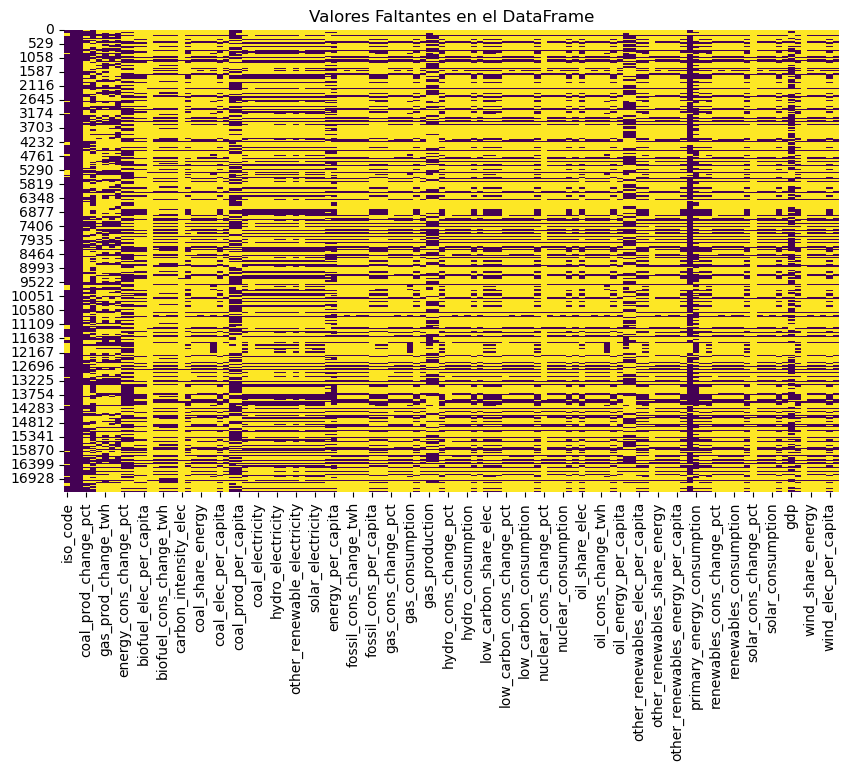

In [9]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(wec.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [6]:
# Creamos un nuevo dataframe solo con países de sudamerica
suram = wec[(wec['iso_code'] == "ARG") | (wec['iso_code'] == "ECU") | (wec['iso_code'] == "GUY") | (wec['iso_code'] == "PER") | (wec['iso_code'] == "GUF") |(wec['iso_code'] == "URY") | (wec['iso_code'] == "PRY") | (wec['iso_code'] == "BOL")  | (wec['iso_code'] == "SUR")  | (wec['iso_code'] == "TTO") | (wec['iso_code'] == "BRA")| (wec['iso_code'] == "CHL") | (wec['iso_code'] == "COL") | (wec['iso_code'] == "VEN")]

In [13]:
suram.shape ## Se verifica la cantidad de fila

(1302, 122)

In [17]:
suram.select_dtypes(include=np.number)

,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
680,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4756635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.311303e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
681,1901,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4929644.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.404338e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682,1902,NaN,0.000,NaN,0.000,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [20]:
n_suram = suram.select_dtypes(include=np.number)

In [22]:
a = n_suram.groupby(["iso_code"]).mean()
a

KeyError: 'iso_code'

In [23]:
# Se observan cuántos valores faltantes tiene cada columna:
missing_values_suram = suram.isnull().sum().sort_values(ascending = False) 
        # datos faltantes ordenados de mayor a menor
        # según la columna
missing_values_suram.groupby(["iso_code"])

KeyError: 'iso_code'

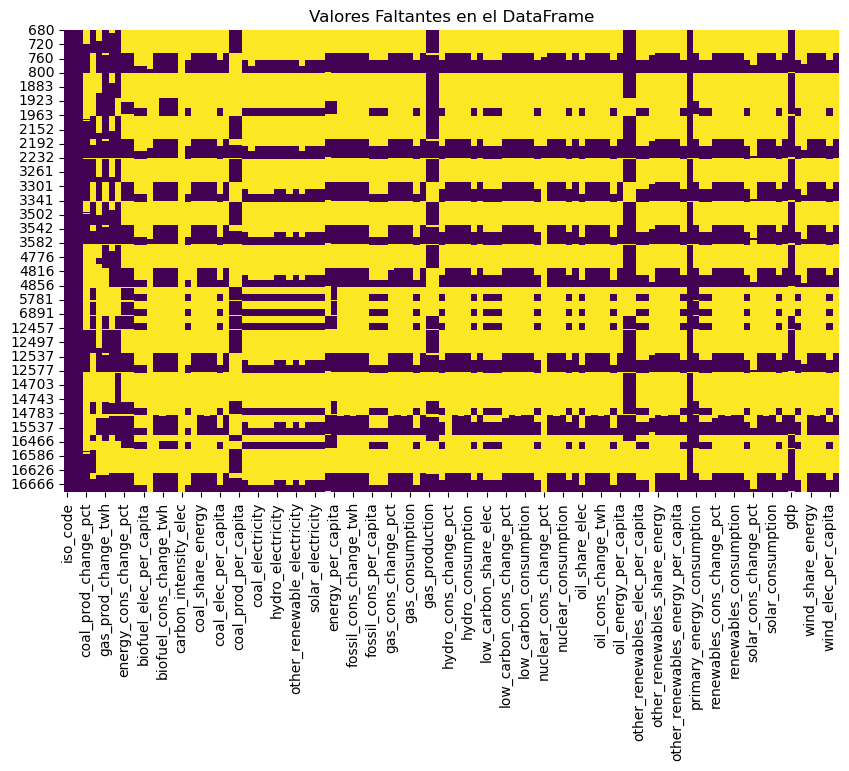

In [24]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(suram.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

## Columns and their description
column 	description
iso_code 	ISO 3166-1 alpha-3 three-letter country codes
country 	Geographic location
year 	Year of observation
coal_prod_change_pct 	Annual percentage change in coal production
coal_prod_change_twh 	Annual change in coal production, measured in terawatt-hours
gas_prod_change_pct 	Annual percentage change in gas production
gas_prod_change_twh 	Annual change in gas production, measured in terawatt-hours
oil_prod_change_pct 	Annual percentage change in oil production
oil_prod_change_twh 	Annual change in oil production, measured in terawatt-hours
energy_cons_change_pct 	Annual percentage change in primary energy consumption
energy_cons_change_twh 	Annual change in primary energy consumption, measured in terawatt-hours
biofuel_share_elec 	Share of electricity consumption that comes from biofuels
biofuel_cons_change_pct 	Annual percentage change in biofuel consumption
biofuel_share_energy 	Share of primary energy consumption that comes from biofuels
biofuel_cons_change_twh 	Annual change in biofuel consumption, measured in terawatt-hours
biofuel_consumption 	Primary energy consumption from biofuels, measured in terawatt-hours
biofuel_elec_per_capita 	Per capita electricity consumption from biofuels, measured in kilowatt-hours
biofuel_cons_per_capita 	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
carbon_intensity_elec 	Carbon intensity of electricity production, measured in grams of carbon dioxide emitted per kilowatt-hour
coal_share_elec 	Share of electricity consumption that comes from coal
coal_cons_change_pct 	Annual percentage change in coal consumption
coal_share_energy 	Share of primary energy consumption that comes from coal
coal_cons_change_twh 	Annual change in coal consumption, measured in terawatt-hours
coal_consumption 	Primary energy consumption from coal, measured in terawatt-hours
coal_elec_per_capita 	Per capita electricity consumption from coal, measured in kilowatt-hours
coal_cons_per_capita 	Per capita primary energy consumption from coal, measured in kilowatt-hours
coal_production 	Coal production, measured in terawatt-hours
coal_prod_per_capita 	Per capita coal production, measured in kilowatt-hours
electricity_generation 	Electricity generation, measured in terawatt-hours
biofuel_electricity 	Electricity generation from biofuels, measured in terawatt-hours
coal_electricity 	Electricity generation from coal, measured in terawatt-hours
fossil_electricity 	Electricity generation from fossil fuels, measured in terawatt-hours. This is the sum of electricity generation from coal, oil and gas.
gas_electricity 	Electricity generation from gas, measured in terawatt-hours
hydro_electricity 	Electricity generation from hydropower, measured in terawatt-hours
nuclear_electricity 	Electricity generation from nuclear power, measured in terawatt-hours
oil_electricity 	Electricity generation from oil, measured in terawatt-hours
other_renewable_electricity 	Electricity generation from other renewable sources, measured in terawatt-hours
other_renewable_exc_biofuel_electricity 	Electricity generation from other renewable sources excluding biofuels, measured in terawatt-hours
renewables_electricity 	Electricity generation from renewables, measured in terawatt-hours
solar_electricity 	Electricity generation from solar, measured in terawatt-hours
wind_electricity 	Electricity generation from wind, measured in terawatt-hours
energy_per_gdp 	Energy consumption per unit of GDP. This is measured in kilowatt-hours per 2011 international-$.
energy_per_capita 	Primary energy consumption per capita, measured in kilowatt-hours per year
fossil_cons_change_pct 	Annual percentage change in fossil fuel consumption
fossil_share_energy 	Share of primary energy consumption that comes from fossil fuels
fossil_cons_change_twh 	Annual change in fossil fuel consumption, measured in terawatt-hours
fossil_fuel_consumption 	Fossil fuel consumption, measured in terawatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_energy_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_cons_per_capita 	Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
fossil_share_elec 	Share of electricity consumption that comes from fossil fuels (coal, oil and gas combined)
gas_share_elec 	Share of electricity consumption that comes from gas
gas_cons_change_pct 	Annual percentage change in gas consumption
gas_share_energy 	Share of primary energy consumption that comes from gas
gas_cons_change_twh 	Annual change in gas consumption, measured in terawatt-hours
gas_consumption 	Primary energy consumption from gas, measured in terawatt-hours
gas_elec_per_capita 	Per capita electricity consumption from gas, measured in kilowatt-hours
gas_energy_per_capita 	Per capita primary energy consumption from gas, measured in kilowatt-hours
gas_production 	Gas production, measured in terawatt-hours
gas_prod_per_capita 	Per capita gas production, measured in kilowatt-hours
hydro_share_elec 	Share of electricity consumption that comes from hydropower
hydro_cons_change_pct 	Annual percentage change in hydropower consumption
hydro_share_energy 	Share of primary energy consumption that comes from hydropower
hydro_cons_change_twh 	Annual change in hydropower consumption, measured in terawatt-hours
hydro_consumption 	Primary energy consumption from hydropower, measured in terawatt-hours
hydro_elec_per_capita 	Per capita electricity consumption from hydropower, measured in kilowatt-hours
hydro_energy_per_capita 	Per capita primary energy consumption from hydropower, measured in kilowatt-hours
low_carbon_share_elec 	Share of electricity consumption that comes from low-carbon sources. This is the sum of electricity from renewables and nuclear
low_carbon_electricity 	Electricity generation from low-carbon sources, measured in terawatt-hours. This is the sum of electricity generation from renewables and nuclear power
low_carbon_elec_per_capita 	Per capita electricity consumption from low-carbon sources, measured in kilowatt-hours
low_carbon_cons_change_pct 	Annual percentage change in low-carbon energy consumption
low_carbon_share_energy 	Share of primary energy consumption that comes from low-carbon sources. This is the sum of primary energy from renewables and nuclear
low_carbon_cons_change_twh 	Annual change in low-carbon energy consumption, measured in terawatt-hours
low_carbon_consumption 	Primary energy consumption from low-carbon sources, measured in terawatt-hours
low_carbon_energy_per_capita 	Per capita primary energy consumption from low-carbon sources, measured in kilowatt-hours
nuclear_share_elec 	Share of electricity consumption that comes from nuclear power
nuclear_cons_change_pct 	Annual percentage change in nuclear consumption
nuclear_share_energy 	Share of primary energy consumption that comes from nuclear power
nuclear_cons_change_twh 	Annual change in nuclear consumption, measured in terawatt-hours
nuclear_consumption 	Primary energy consumption from nuclear power, measured in terawatt-hours
nuclear_elec_per_capita 	Per capita electricity consumption from nuclear power, measured in kilowatt-hours
nuclear_energy_per_capita 	Per capita primary energy consumption from nuclear, measured in kilowatt-hours
oil_share_elec 	Share of electricity consumption that comes from oil
oil_cons_change_pct 	Annual percentage change in oil consumption
oil_share_energy 	Share of primary energy consumption that comes from oil
oil_cons_change_twh 	Annual change in oil consumption, measured in terawatt-hours
oil_consumption 	Primary energy consumption from oil, measured in terawatt-hours
oil_elec_per_capita 	Primary energy consumption from oil, measured in terawatt-hours
oil_energy_per_capita 	Per capita primary energy consumption from oil, measured in kilowatt-hours
oil_production 	Oil production, measured in terawatt-hours
oil_prod_per_capita 	Per capita oil production, measured in kilowatt-hours
other_renewables_elec_per_capita 	Per capita electricity consumption from other renewables, measured in kilowatt-hours
other_renewables_share_elec 	Share of electricity consumption that comes from other renewables
other_renewables_cons_change_pct 	Annual percentage change in energy consumption from other renewables
other_renewables_share_energy 	Share of primary energy consumption that comes from other renewables
other_renewables_cons_change_twh 	Annual change in other renewable consumption, measured in terawatt-hours
other_renewable_consumption 	Primary energy consumption from other renewables, measured in terawatt-hours
other_renewables_energy_per_capita 	Per capita primary energy consumption from other renewables, measured in kilowatt-hours
per_capita_electricity 	Electricity consumption per capita, measured in kilowatt-hours
population 	Total population
primary_energy_consumption 	Primary energy consumption, measured in terawatt-hours
renewables_elec_per_capita 	Per capita primary energy consumption from renewables, measured in kilowatt-hours
renewables_share_elec 	Share of electricity consumption that comes from renewables
renewables_cons_change_pct 	Annual percentage change in renewable energy consumption
renewables_share_energy 	Share of primary energy consumption that comes from renewables
renewables_cons_change_twh 	Annual change in renewable energy consumption, measured in terawatt-hours
renewables_consumption 	Primary energy consumption from renewables, measured in terawatt-hours
renewables_energy_per_capita 	Per capita electricity consumption from renewables, measured in kilowatt-hours
solar_share_elec 	Share of electricity consumption that comes from solar
solar_cons_change_pct 	Annual percentage change in solar consumption
solar_share_energy 	Share of primary energy consumption that comes from solar
solar_cons_change_twh 	Annual change in solar consumption, measured in terawatt-hours
solar_consumption 	Primary energy consumption from solar, measured in terawatt-hours
solar_elec_per_capita 	Per capita electricity consumption from solar, measured in kilowatt-hours
solar_energy_per_capita 	Per capita primary energy consumption from solar, measured in kilowatt-hours
gdp 	Total real gross domestic product, inflation-adjusted
wind_share_elec 	Share of electricity consumption that comes from wind
wind_cons_change_pct 	Annual percentage change in wind consumption
wind_share_energy 	Share of primary energy consumption that comes from wind
wind_cons_change_twh 	Annual change in wind consumption, measured in terawatt-hours
wind_consumption 	Primary energy consumption from wind, measured in terawatt-hours
wind_elec_per_capita 	Per capita electricity consumption from wind, measured in kilowatt-hours
wind_energy_per_capita 	Per capita primary energy consumption from wind, measured in kilowatt-hours

In [32]:
graf = suram.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


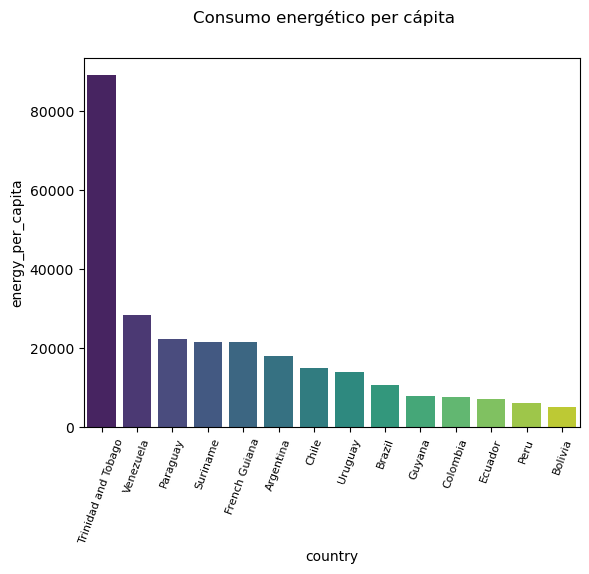

In [36]:
sns.barplot(x='country', y="energy_per_capita", data=graf, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [7]:
# filtro de paises
paises = ['Egypt','Saudi Arabia','United Kingdom','France','Germany','United States','Japan','India', "Argentina", "Brazil", "Chile", "Bolivia"]
#filter columns
seleccion =wec.loc[wec['country'].isin(paises)]

In [38]:
seleccion.shape

(1385, 122)

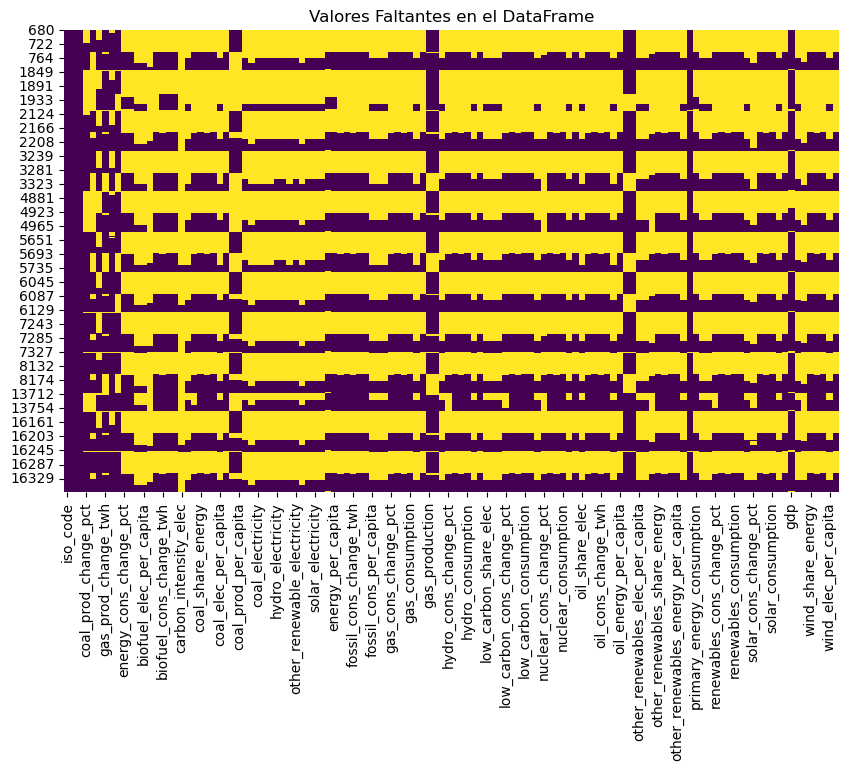

In [39]:
# visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(seleccion.isnull(), cmap='viridis', cbar=False)
plt.title('Valores Faltantes en el DataFrame')
plt.show()

In [42]:
graf2 = seleccion.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)



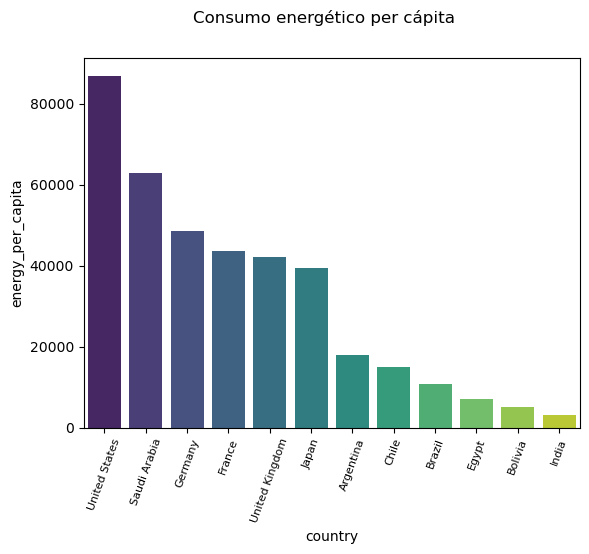

In [43]:
sns.barplot(x='country', y="energy_per_capita", data=graf2, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [8]:
nulls=suram.isna().sum()
for i in nulls.index:
    if nulls[i]>0:
        suram[i].ffill(inplace=True)
        suram[i].bfill(inplace=True)
suram.isna().sum()


iso_code                                      0
country                                       0
year                                          0
coal_prod_change_pct                          0
coal_prod_change_twh                          0
gas_prod_change_pct                           0
gas_prod_change_twh                           0
oil_prod_change_pct                           0
oil_prod_change_twh                           0
energy_cons_change_pct                        0
energy_cons_change_twh                        0
biofuel_share_elec                            0
biofuel_elec_per_capita                       0
biofuel_cons_change_pct                       0
biofuel_share_energy                          0
biofuel_cons_change_twh                       0
biofuel_consumption                           0
biofuel_cons_per_capita                       0
carbon_intensity_elec                      1302
coal_share_elec                               0
coal_cons_change_pct                    

In [35]:
nulls2=wec.isna().sum()
for i in nulls2.index:
    if nulls2[i]>0:
        wec[i].ffill(inplace=True)
        wec[i].bfill(inplace=True)
wec.isna().sum()

iso_code                                   0
country                                    0
year                                       0
coal_prod_change_pct                       0
coal_prod_change_twh                       0
gas_prod_change_pct                        0
gas_prod_change_twh                        0
oil_prod_change_pct                        0
oil_prod_change_twh                        0
energy_cons_change_pct                     0
energy_cons_change_twh                     0
biofuel_share_elec                         0
biofuel_elec_per_capita                    0
biofuel_cons_change_pct                    0
biofuel_share_energy                       0
biofuel_cons_change_twh                    0
biofuel_consumption                        0
biofuel_cons_per_capita                    0
carbon_intensity_elec                      0
coal_share_elec                            0
coal_cons_change_pct                       0
coal_share_energy                          0
coal_cons_

In [32]:
nulls2=wec.isna().sum()
for i in nulls2.index:
    if nulls2[i]>0:
        wec[i].ffill(inplace=True)
        wec[i].bfill(inplace=True)
wec.isna().sum()


iso_code                                   0
country                                    0
year                                       0
coal_prod_change_pct                       0
coal_prod_change_twh                       0
gas_prod_change_pct                        0
gas_prod_change_twh                        0
oil_prod_change_pct                        0
oil_prod_change_twh                        0
energy_cons_change_pct                     0
energy_cons_change_twh                     0
biofuel_share_elec                         0
biofuel_elec_per_capita                    0
biofuel_cons_change_pct                    0
biofuel_share_energy                       0
biofuel_cons_change_twh                    0
biofuel_consumption                        0
biofuel_cons_per_capita                    0
carbon_intensity_elec                      0
coal_share_elec                            0
coal_cons_change_pct                       0
coal_share_energy                          0
coal_cons_

In [44]:
graf3 = suram.groupby("country")["energy_per_capita"].mean().reset_index().sort_values("energy_per_capita", ascending=False)


In [46]:
graf

,country,energy_per_capita
11,Trinidad and Tobago,89086.141782
13,Venezuela,28462.877436
8,Paraguay,22229.705351
10,Suriname,21651.165270
6,French Guiana,21580.134324
0,Argentina,17878.781909
3,Chile,15074.526964
12,Uruguay,14005.675189
2,Brazil,10757.510345
7,Guyana,7787.527514


In [47]:
graf3

,country,energy_per_capita
11,Trinidad and Tobago,89086.141782
13,Venezuela,23989.495950
8,Paraguay,22947.510225
6,French Guiana,21227.363550
9,Peru,19977.149231
4,Colombia,16620.250157
1,Bolivia,16058.760091
0,Argentina,15897.413438
3,Chile,15822.283562
12,Uruguay,14610.421707


Recursos:
https://www.gem.wiki/Energy_profile:_Trinidad_and_Tobago
https://ourworldindata.org/energy/country/trinidad-and-tobago#per-capita-what-is-the-average-energy-consumption-per-person

# Consumo de energia per cápita y PBI (todos los países)

In [90]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values = wec.groupby('country').agg({'energy_per_capita': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp']})

In [121]:
g1 = mean_values.sort_values("energy_per_capita", ascending=False)

In [124]:
g1.head(20)

,country,energy_per_capita,gdp
83,Gibraltar,877841.144675,1.000000e+11
84,Greece,831031.738595,9.696227e+10
229,United States Virgin Islands,223684.883250,1.720000e+13
225,United Arab Emirates,125305.912200,4.358727e+11
177,Qatar,101420.370075,1.102246e+11
97,Iceland,100207.029127,8.257337e+09
121,Luxembourg,100205.561857,1.891982e+10
98,India,98156.230736,1.408727e+12
218,Tunisia,96764.388678,3.362010e+10
194,Singapore,94405.597250,1.312161e+11


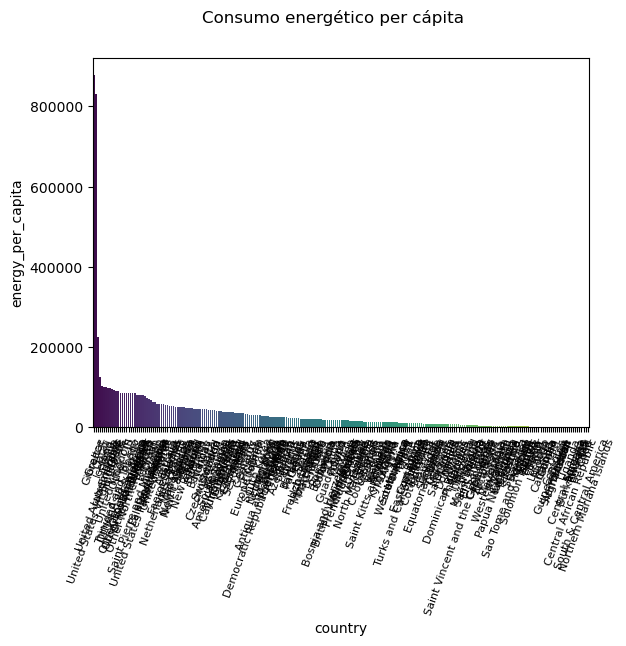

In [123]:
sns.barplot(x='country', y="energy_per_capita", data=g1, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

Filtramos los países con población menor a dos desviaciones estándar

In [126]:
wec.shape

(17432, 123)

In [129]:

# Calcular la media y la desviación estándar de la población
mean_population = wec['population'].mean()
std_population = wec['population'].std()

# Filtrar el DataFrame original
wec_filtrado = wec[wec['population'] >= (mean_population -  std_population)]
wec_filtrado.shape

(17432, 123)

In [132]:
# Ordenar el DataFrame por población de forma ascendente
wec_sorted = wec.sort_values(by='population')

In [133]:
wec_sorted

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,energy_cons_change_twh,biofuel_share_elec,biofuel_elec_per_capita,biofuel_cons_change_pct,biofuel_share_energy,biofuel_cons_change_twh,biofuel_consumption,biofuel_cons_per_capita,carbon_intensity_elec,coal_share_elec,coal_cons_change_pct,coal_share_energy,coal_cons_change_twh,coal_consumption,coal_elec_per_capita,coal_cons_per_capita,coal_production,coal_prod_per_capita,electricity_generation,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity,energy_per_gdp,energy_per_capita,fossil_cons_change_pct,fossil_share_energy,fossil_cons_change_twh,fossil_fuel_consumption,fossil_energy_per_capita,fossil_cons_per_capita,fossil_share_elec,gas_share_elec,gas_cons_change_pct,gas_share_energy,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_energy_per_capita,gas_production,gas_prod_per_capita,hydro_share_elec,hydro_cons_change_pct,hydro_share_energy,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_energy_per_capita,low_carbon_share_elec,low_carbon_electricity,low_carbon_elec_per_capita,low_carbon_cons_change_pct,low_carbon_share_energy,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_energy_per_capita,nuclear_share_elec,nuclear_cons_change_pct,nuclear_share_energy,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_energy_per_capita,oil_share_elec,oil_cons_change_pct,oil_share_energy,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_energy_per_capita,oil_production,oil_prod_per_capita,other_renewables_elec_per_capita,other_renewables_share_elec,other_renewables_cons_change_pct,other_renewables_share_energy,other_renewables_cons_change_twh,other_renewable_consumption,other_renewables_energy_per_capita,per_capita_electricity,population,primary_energy_consumption,renewables_elec_per_capita,renewables_share_elec,renewables_cons_change_pct,renewables_share_energy,renewables_cons_change_twh,renewables_consumption,renewables_energy_per_capita,solar_share_elec,solar_cons_change_pct,solar_share_energy,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,mean_epc
11136,NIU,Niue,2008,0.000,0.000,2.092,10.096,5.251,58.753,58.094,0.014,0.000,0.000,15.815,0.000,0.000,0.000,0.000,318.0,0.000,14.228,6.770,2.147,17.235,0.000,3603.389,0.000,0.000,0.003,0.000,0.000,0.003,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.512,19662.562,4.094,64.587,6.467,164.422,34376.311,1500.000,100.000,0.000,8.859,18.853,3.906,47.996,0.000,10034.623,492.792,2452.140,0.000,-3.038,24.887,-1.985,63.355,0.000,13245.875,0.000,0.000,0.000,-1.493,35.400,-1.366,90.120,18841.714,0.000,10.828,0.000,0.000,0.000,0.000,0.000,100.000,0.419,38.964,0.414,99.191,1500.000,20738.298,1177.611,5859.811,0.000,0.000,0.513,8.197,0.107,20.866,4362.602,1500.000,2.000000e+03,0.039,0.000,0.000,-1.493,35.400,-1.366,90.120,18841.714,0.000,27.236,0.123,0.067,0.314,0.000,65.689,9.900000e+11,0.000,8.658,2.194,0.445,5.584,0.000,1167.548,9858.564700
11144,NIU,Niue,2016,0.000,0.000,2.092,10.096,5.251,58.753,-6.694,-0.002,0.000,0.000,15.815,0.000,0.000,0.000,0.000,318.0,0.000,14.228,6.770,2.147,17.235,0.000,3603.389,0.000,0.000,0.003,0.000,0.000,0.003,0.000,0.000,0.000,0.003,0.000,0.000,0.000,0.000,0.000,0.512,14999.042,4.094,64.587,6.467,164.422,34376.311,1500.000,100.000,0.000,8.859,18.853,3.906,47.996,0.000,10034.623,492.792,2452.140,0.000,-3.038,24.887,-1.985,63.355,0.000,13245.875,0.000,0.000,0.000,-1.493,35.400,-1.366,90.120,18841.714,0.000,10.828,0.000,0.000,0.000,0.000,0.000,100.000,0.419,3

In [135]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values3 = wec.groupby('country').agg({'population': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
pop = pd.DataFrame({'country': mean_values3['country'],
                          'mean_pop': mean_values3['population'],
                          'mean_gdp': mean_values3['gdp']})

In [138]:
pop1 = mean_values3.sort_values("population", ascending=False)
pop1.head(20)

,country,population,gdp
237,World,3.739477e+09,2.791136e+13
43,China,8.093528e+08,2.967256e+12
70,Europe (other),7.471830e+08,1.840000e+11
69,Europe,6.024720e+08,1.840000e+11
98,India,5.996395e+08,1.408727e+12
1,Africa,4.289009e+08,6.429743e+10
228,United States Pacific Islands,3.290650e+08,1.720000e+13
153,North America,2.048553e+08,9.900000e+11
227,United States,1.912040e+08,5.701116e+12
133,Middle Africa,1.275760e+08,1.880000e+12


In [139]:
pop1.tail(20)

,country,population,gdp
192,Seychelles,81500.000000,1.377862e+09
6,Antigua and Barbuda,76025.000000,1.480000e+11
58,Dominica,71400.000000,5.644950e+08
22,Bermuda,63075.000000,2.326501e+10
4,American Samoa,51425.000000,5.340000e+11
72,Falkland Islands,48000.000000,1.840000e+11
71,Faeroe Islands,46648.648649,1.840000e+11
156,Northern Mariana Islands,46378.378378,2.916270e+10
183,Saint Kitts and Nevis,45250.000000,2.020430e+10
38,Cayman Islands,40350.000000,3.601136e+09


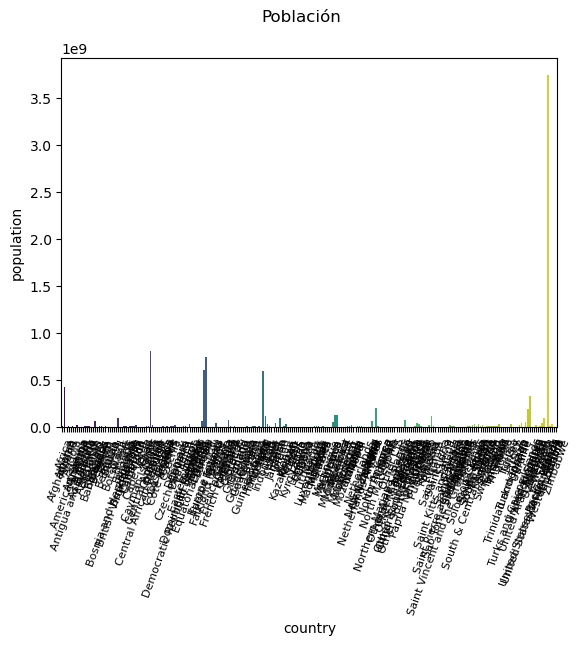

In [136]:
sns.barplot(x='country', y="population", data=mean_values3, palette="viridis")
plt.suptitle('Población')
plt.xticks(rotation=70, fontsize=8)
plt.show()

In [131]:


# Seleccionar las filas correspondientes a los 20 países con menor población
countries_to_remove = wec_sorted.head(20)

# Eliminar esas filas del DataFrame original
wec_filtered = wec[~wec['country'].isin(countries_to_remove['country'])]

# Muestra el DataFrame resultante
print(wec_filtered)


-303426258.7904387

In [ ]:
# Calcula la media de 'energy_per_capita' y 'gdp' por país
mean_values2 = wec.groupby('country').agg({'energy_per_capita': 'mean', 'gdp': 'mean'}).reset_index()

# Crea un nuevo DataFrame con las medias por país
df = pd.DataFrame({'country': mean_values['country'],
                          'mean_epc': mean_values['energy_per_capita'],
                          'mean_gdp': mean_values['gdp']})

In [ ]:
g1 = mean_values.sort_values("energy_per_capita", ascending=False)

In [ ]:
g1.head(20)

,country,energy_per_capita,gdp
83,Gibraltar,877841.144675,1.000000e+11
84,Greece,831031.738595,9.696227e+10
229,United States Virgin Islands,223684.883250,1.720000e+13
225,United Arab Emirates,125305.912200,4.358727e+11
177,Qatar,101420.370075,1.102246e+11
97,Iceland,100207.029127,8.257337e+09
121,Luxembourg,100205.561857,1.891982e+10
98,India,98156.230736,1.408727e+12
218,Tunisia,96764.388678,3.362010e+10
194,Singapore,94405.597250,1.312161e+11


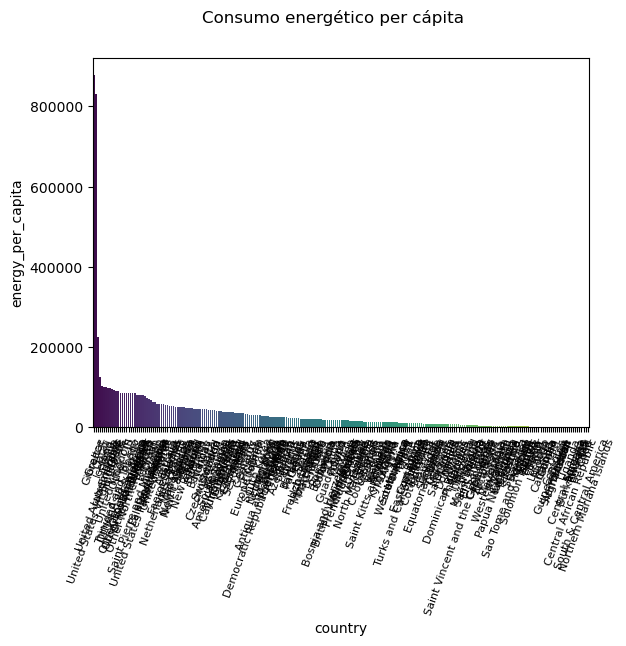

In [ ]:
sns.barplot(x='country', y="energy_per_capita", data=g1, palette="viridis")
plt.suptitle('Consumo energético per cápita')
plt.xticks(rotation=70, fontsize=8)
plt.show()

# MODELO NO SUPERVISADO

In [4]:
# Se importan las librerías que se utilizarán: 
# import pandas as pd
# import numpy as np
import sklearn
# import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.cluster import KMeans
# import re
# import array
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')

In [80]:
# features = ["energy_per_capita", "renewables_electricity", "energy_per_gdp", "gdp", "population"]
features = ["mean_epc", "gdp"]
X = wec[features]
# X = suram[features]
X.head(5)

,mean_epc,gdp
0,671.665142,1.949480e+10
1,671.665142,1.949480e+10
2,671.665142,1.949480e+10
3,671.665142,1.949480e+10
4,671.665142,1.949480e+10


In [81]:
X.head(5)

,mean_epc,gdp
0,671.665142,1.949480e+10
1,671.665142,1.949480e+10
2,671.665142,1.949480e+10
3,671.665142,1.949480e+10
4,671.665142,1.949480e+10


In [91]:
df.shape

(242, 3)

In [96]:
X = df[["mean_epc", "mean_gdp"]]

<Axes: xlabel='mean_epc', ylabel='mean_gdp'>

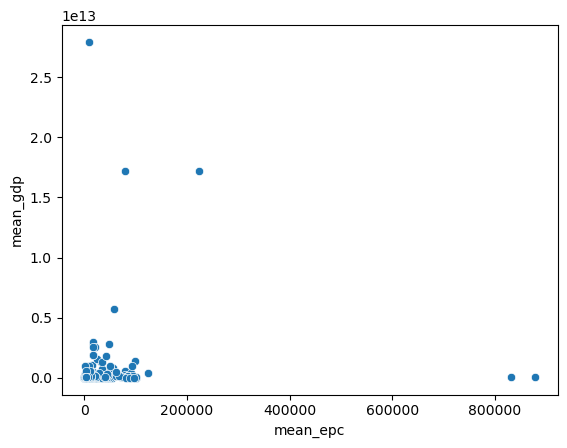

In [115]:
sns.scatterplot(data=X, x="mean_epc", y="mean_gdp")

In [98]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_scal = scale.fit_transform(X)

print(X_scal)

[[-4.10010585e-01 -2.06786695e-01]
 [-3.90557634e-01 -1.91385436e-01]
 [-3.32929088e-01 -2.14673996e-01]
 [-2.71032915e-01 -1.60689346e-01]
 [ 1.05425103e-01  3.33034177e-03]
 [-1.91645897e-01 -7.17862307e-02]
 [-5.71240251e-02 -1.56686432e-01]
 [-1.00062508e-01 -9.79819266e-02]
 [-2.58870437e-01 -2.10706038e-01]
 [ 1.41940061e-01 -2.06437814e-01]
 [ 2.22031253e-01 -2.06437814e-01]
 [ 2.73598365e-01 -8.88661424e-02]
 [ 2.94062668e-01 -1.68041879e-01]
 [-1.17831734e-01 -1.86228513e-01]
 [ 1.40223208e-01 -1.57930086e-01]
 [ 4.71075650e-01 -1.79366893e-01]
 [ 6.22478464e-01 -1.64740849e-01]
 [-1.33230029e-01 -2.16394167e-01]
 [-2.54726150e-02 -1.65542784e-01]
 [ 1.43011746e-01 -1.52333951e-01]
 [-3.21111035e-01 -3.23210638e-02]
 [-4.04327448e-01 -2.13100522e-01]
 [ 9.32593789e-02 -2.08395477e-01]
 [-2.19053841e-01 -2.08395477e-01]
 [-1.19736587e-01 -2.12352644e-01]
 [-1.92299372e-01 -2.06357306e-01]
 [-1.86455449e-01 -2.08472797e-01]
 [-2.90998761e-01  5.06008404e-02]
 [-1.95890206e-01  9

In [99]:
pd.DataFrame(X_scal).head(5)

,0,1
0,-0.410011,-0.206787
1,-0.390558,-0.191385
2,-0.332929,-0.214674
3,-0.271033,-0.160689
4,0.105425,0.003330


In [100]:
pd.DataFrame(X_scal).shape

(242, 2)

In [103]:
#Se realiza el método del codo para determinar la cantidad de clusters
k=np.arange(1,11)
lista_inercias = []
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0) 
# Instancia la clase KMeans
    kmeans.fit(X_scal)  
# Ajusta el modelo KMeans a tus datos x
    lista_inercias.append(kmeans.inertia_)

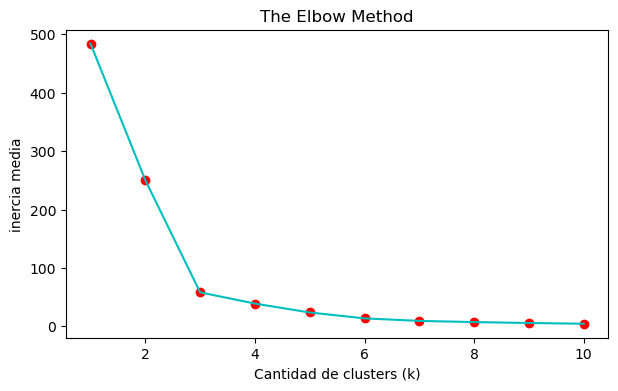

In [104]:
# Se grafica el método del codo
plt.figure(figsize=(7, 4))
plt.plot(k, lista_inercias, color='c')
plt.scatter(k, lista_inercias, c='r')
plt.xlabel('Cantidad de clusters (k)')
plt.ylabel('inercia media')
plt.title('The Elbow Method')
plt.show()

In [105]:
# Se realiza la evaluación con silhoutte
sil = []
kmax = 11

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 3
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_scal)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_scal, labels, metric='euclidean'))

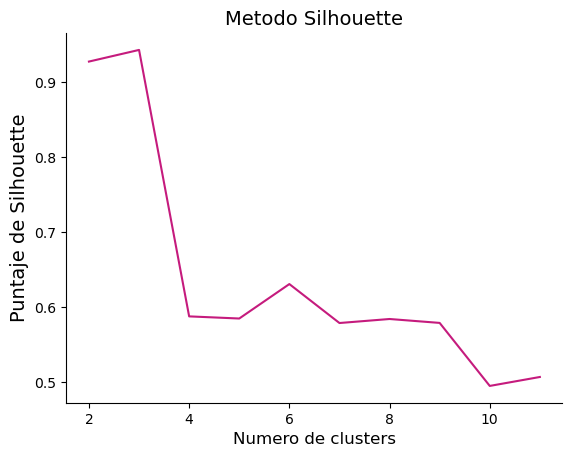

In [107]:
# Se grafica
plt.plot(range(2,12),sil, c="#c51b7d")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.title('Metodo Silhouette', size=14)
plt.xlabel('Numero de clusters', size=12)
plt.ylabel('Puntaje de Silhouette', size=14)
plt.show()

In [108]:
# Se instancia el modelo con el numero de clusters 
kmeansmodel2 = KMeans(n_clusters=3, random_state=0)
kmeansmodel2.fit(X_scal)
# Etiquetas de los clusters
etiquetas_2 = kmeansmodel2.labels_
np.unique(etiquetas_2)
# Se hace la predicción:
y_means2=kmeansmodel2.fit_predict(X_scal)

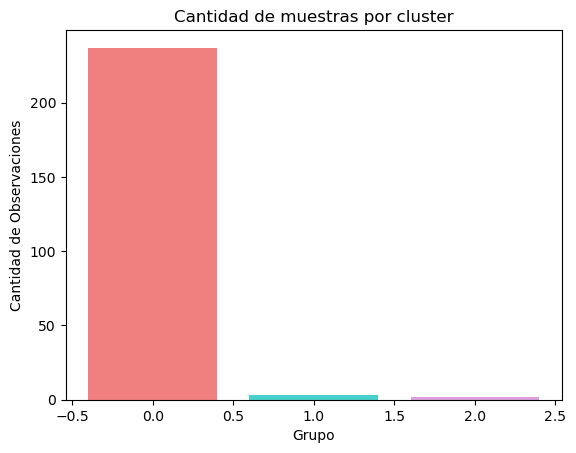

In [109]:
#Se verifica la cantidad de observaciones
cluster_counts = np.bincount(y_means2)
cluster_labels = list(range(len(cluster_counts)))
colors = ['lightcoral', 'mediumturquoise', 'plum']
plt.bar(cluster_labels, cluster_counts, color=colors)
plt.title('Cantidad de muestras por cluster')
plt.xlabel('Grupo')
plt.ylabel('Cantidad de Observaciones')
plt.show()


In [110]:
# Se observan las coordenandas de los centroides
centroids2 =kmeansmodel2.cluster_centers_
print(centroids2)

[[-0.09703593 -0.10473714]
 [ 0.87602911  8.39237741]
 [10.18471446 -0.17721454]]


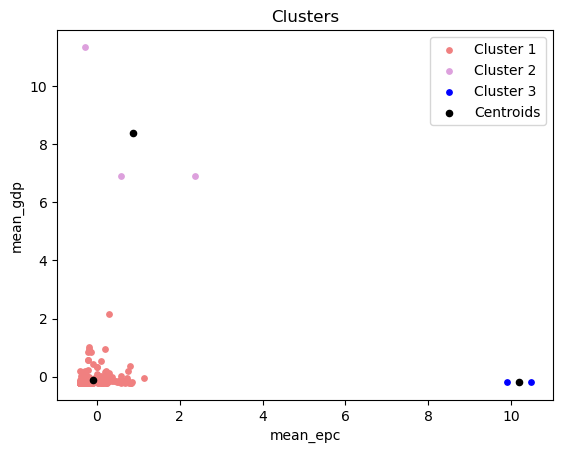

In [113]:
plt.scatter(X_scal[y_means2 == 0, 0], X_scal[y_means2 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means2 == 1, 0], X_scal[y_means2 == 1, 1], s = 15, c = 'plum', label = 'Cluster 2')
plt.scatter(X_scal[y_means2 == 2, 0], X_scal[y_means2 == 2, 1], s = 15, c = 'blue', label = 'Cluster 3')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('mean_epc')
plt.ylabel('mean_gdp')
plt.legend()
plt.show()

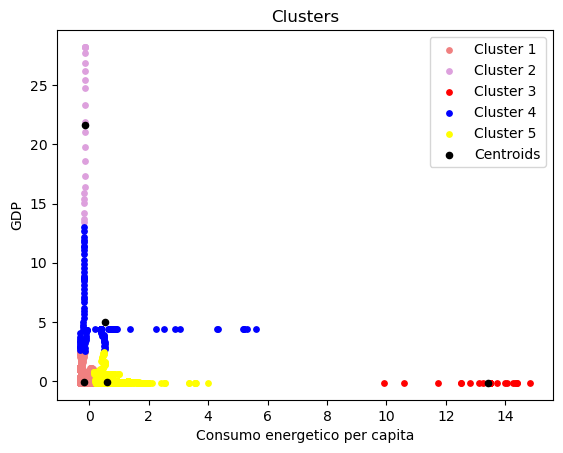

In [70]:
plt.scatter(X_scal[y_means2 == 0, 0], X_scal[y_means2 == 0, 1], s = 15, c = 'lightcoral', label = 'Cluster 1')
plt.scatter(X_scal[y_means2 == 1, 0], X_scal[y_means2 == 1, 1], s = 15, c = 'plum', label = 'Cluster 2')
plt.scatter(X_scal[y_means2 == 2, 0], X_scal[y_means2 == 2, 1], s = 15, c = 'red', label = 'Cluster 3')
plt.scatter(X_scal[y_means2 == 3, 0], X_scal[y_means2 == 3, 1], s = 15, c = 'blue', label = 'Cluster 4')
plt.scatter(X_scal[y_means2 == 4, 0], X_scal[y_means2 == 4, 1], s = 15, c = 'yellow', label = 'Cluster 5')
plt.scatter(kmeansmodel2.cluster_centers_[:, 0], kmeansmodel2.cluster_centers_[:, 1], s = 20, c = 'black', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Consumo energetico per capita')
plt.ylabel('GDP')
plt.legend()
plt.show()